In [1]:
#!pip install dask
#!pip install netcdf4
#!pip3 install --user h5py netcdf4

In [2]:
import dask
import dask.array as da
import xarray as xr
import numpy as np
caminho_era='ERA5_ventos_2012_2017.nc'


ds_ERA5 = xr.open_mfdataset(caminho_era, chunks={'time': 100})  # Adjust chunk size as needed
#Dask will load the data lazily, and computations will be performed on chunks of data, 

display(ds_ERA5)

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 49, time: 52608)
Coordinates:
  * longitude  (longitude) float32 -47.0 -46.75 -46.5 ... -35.5 -35.25 -35.0
  * latitude   (latitude) float32 -7.0 -7.25 -7.5 -7.75 ... -18.5 -18.75 -19.0
  * time       (time) datetime64[ns] 2012-01-01 ... 2017-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(100, 49, 49), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(100, 49, 49), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-01 11:59:33 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
#!pip install nctoolkit

import nctoolkit as nc
#versão nova do CDO

ds = nc.open_data(['ERA5_ventos_2006_2011.nc', 'ERA5_ventos_2012_2017.nc'])
ds.merge("time")
### convert to xarray object if neede
ds_xr = ds.to_xarray()

import xarray as xr

### Abra o conjunto de dados usando open_mfdataset
ds = xr.open_mfdataset(['ERA5_ventos_2006_2011.nc', 'ERA5_ventos_2012_2017.nc'], combine='nested', concat_dim='time')
#ds = xr.open_mfdataset('ERA5_ventos_*.nc', combine='nested', concat_dim='time')

### Salve o conjunto de dados em um novo arquivo NetCDF
ds.to_netcdf('CompletoNetCDF/ERA5_ventos2006_2017.nc')


### juntar pelo CDO a mesma variável

cdo mergetime ERA5_ventos_2006_2011.nc ERA5_ventos_2012_2017.nc Juntado_ERA5_ventos_2006_2017.nc 


do copy ERA5_ventos_2006_2011.nc ERA5_ventos_2012_2017.nc Juntado_ERA5_ventos_2006_2017.nc

In [4]:

#caminho_era2 = 'Juntado_ERA5_ventos_2006_2017.nc'
ds_ERA5 = xr.open_mfdataset(caminho_era, chunks={'time': 100})  # Adjust chunk size as needed
#Dask will load the data lazily, and computations will be performed on chunks of data, 

display(ds_ERA5)

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 49, time: 52608)
Coordinates:
  * longitude  (longitude) float32 -47.0 -46.75 -46.5 ... -35.5 -35.25 -35.0
  * latitude   (latitude) float32 -7.0 -7.25 -7.5 -7.75 ... -18.5 -18.75 -19.0
  * time       (time) datetime64[ns] 2012-01-01 ... 2017-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(100, 49, 49), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(100, 49, 49), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-01 11:59:33 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [5]:
ds_ERA5.data_vars

Data variables:
    u10      (time, latitude, longitude) float32 dask.array<chunksize=(100, 49, 49), meta=np.ndarray>
    v10      (time, latitude, longitude) float32 dask.array<chunksize=(100, 49, 49), meta=np.ndarray>

In [6]:
ds_ERA5.time

<xarray.DataArray 'time' (time: 52608)>
array(['2012-01-01T00:00:00.000000000', '2012-01-01T01:00:00.000000000',
       '2012-01-01T02:00:00.000000000', ..., '2017-12-31T21:00:00.000000000',
       '2017-12-31T22:00:00.000000000', '2017-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 ... 2017-12-31T23:00:00
Attributes:
    long_name:  time

In [7]:
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim

nome= 'Salvador, Bahia, Brasil'

# Criar um objeto geocoder (funcionava antigamente)
geolocator = Nominatim(user_agent="myGeocoder")
#correcao do erro
geolocator = Photon(user_agent="measurements")


# Obter a localização (coordenadas geográficas)
location = geolocator.geocode(nome)

if location:
    print("Endereço completo:", location.address)
    print("Latitude:", location.latitude)
    print("Longitude:", location.longitude)
    lat_0= location.latitude
    lon_0= location.longitude
        
else:
    print("Localização não encontrada.")
        

print(lat_0,lon_0)


Endereço completo: Salvador, Bahia, Brasil
Latitude: -12.9822499
Longitude: -38.4812772
-12.9822499 -38.4812772


In [8]:
ds_ponto = ds_ERA5.sel(latitude= lat_0, longitude = lon_0, method = 'nearest')

In [9]:
ds_ponto

<xarray.Dataset>
Dimensions:    (time: 52608)
Coordinates:
    longitude  float32 -38.5
    latitude   float32 -13.0
  * time       (time) datetime64[ns] 2012-01-01 ... 2017-12-31T23:00:00
Data variables:
    u10        (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    v10        (time) float32 dask.array<chunksize=(100,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-01 11:59:33 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [10]:
# transformar em dataframe
df_ponto = ds_ponto.to_dataframe().drop(columns = ['longitude', 'latitude'])

In [11]:
df_ponto

,u10,v10
time,,
2012-01-01 00:00:00,-7.306232,-2.769499
2012-01-01 01:00:00,-6.766560,-2.983020
2012-01-01 02:00:00,-6.241856,-3.090807
2012-01-01 03:00:00,-5.989011,-3.176524
2012-01-01 04:00:00,-5.890705,-3.277125
...,...,...
2017-12-31 19:00:00,-6.702236,0.994326
2017-12-31 20:00:00,-6.922717,0.529814
2017-12-31 21:00:00,-7.098292,-0.136413


In [12]:
df_ponto.index.name= 'Data'
df_ponto_2= df_ponto.reset_index()

In [13]:
df_ponto_2

,Data,u10,v10
0,2012-01-01 00:00:00,-7.306232,-2.769499
1,2012-01-01 01:00:00,-6.766560,-2.983020
2,2012-01-01 02:00:00,-6.241856,-3.090807
3,2012-01-01 03:00:00,-5.989011,-3.176524
4,2012-01-01 04:00:00,-5.890705,-3.277125
...,...,...,...
52603,2017-12-31 19:00:00,-6.702236,0.994326
52604,2017-12-31 20:00:00,-6.922717,0.529814
52605,2017-12-31 21:00:00,-7.098292,-0.136413
52606,2017-12-31 22:00:00,-6.968835,-0.973560


In [14]:
from scipy.spatial.distance import cdist
import math

df_ponto_2['VEL(m/s)'] = np.sqrt(df_ponto_2['u10']**2 + df_ponto_2['v10']**2)
df_ponto_2['VEL(km/h)'] = df_ponto_2['VEL(m/s)']*3.6

#df_ponto_2 vento
df_ponto_2['W03'] = df_ponto_2.apply(lambda row: math.acos(row['u10'] / (math.sqrt(row['u10']**2 + row['v10']**2))) * 180 / 3.1415, axis=1)

# Crie as colunas W04, W05, W06, W07 com base nas condições        
df_ponto_2['W04'] = df_ponto_2.apply(lambda row: row['W03'] - 90 if row['u10'] <= 0.0 and row['v10'] <= 0.0 else 0.0, axis=1)
df_ponto_2['W05'] = df_ponto_2.apply(lambda row: 270 - row['W03'] if row['u10'] <= 0.0 and row['v10'] > 0.0 else 0.0, axis=1)
df_ponto_2['W06'] = df_ponto_2.apply(lambda row: 270 - row['W03'] if row['u10'] > 0.0 and row['v10'] >= 0.0 else 0.0, axis=1)
df_ponto_2['W07'] = df_ponto_2.apply(lambda row: 270 + row['W03'] if row['u10'] > 0.0 and row['v10'] < 0.0 else 0.0, axis=1)

# Crie a coluna W08 somando as colunas anteriores
#df_ponto_2['W08'] = df_ponto_2['W04'] + df_ponto_2['W05'] + df_ponto_2['W06'] + df_ponto_2['W07']            
df_ponto_2['DirVen'] = df_ponto_2['W04'] + df_ponto_2['W05'] + df_ponto_2['W06'] + df_ponto_2['W07']     

In [15]:
df_ponto_2['VELkm_h'] = df_ponto_2['VEL(km/h)']

In [16]:
df_ponto_2

,Data,u10,v10,VEL(m/s),VEL(km/h),W03,W04,W05,W06,W07,DirVen,VELkm_h
0,2012-01-01 00:00:00,-7.306232,-2.769499,7.813524,28.128685,159.244993,69.244993,0.000000,0.0,0.0,69.244993,28.128685
1,2012-01-01 01:00:00,-6.766560,-2.983020,7.394913,26.621687,156.214449,66.214449,0.000000,0.0,0.0,66.214449,26.621687
2,2012-01-01 02:00:00,-6.241856,-3.090807,6.965189,25.074678,153.661096,63.661096,0.000000,0.0,0.0,63.661096,25.074678
3,2012-01-01 03:00:00,-5.989011,-3.176524,6.779274,24.405386,152.063361,62.063361,0.000000,0.0,0.0,62.063361,24.405386
4,2012-01-01 04:00:00,-5.890705,-3.277125,6.740916,24.267298,150.916328,60.916328,0.000000,0.0,0.0,60.916328,24.267298
...,...,...,...,...,...,...,...,...,...,...,...,...
52603,2017-12-31 19:00:00,-6.702236,0.994326,6.775592,24.392130,171.566364,0.000000,98.433636,0.0,0.0,98.433636,24.392130
52604,2017-12-31 20:00:00,-6.922717,0.529814,6.942961,24.994659,175.628709,0.000000,94.371291,0.0,0.0,94.371291,24.994659
52605,2017-12-31 21:00:00,-7.098292,-0.136413,7.099603,25.558569,178.904319,88.904319,0.000000,0.0,0.0,88.904319,25.558569
52606,2017-12-31 22:00:00,-6.968835,-0.973560,7.036511,25.331438,172.052215,82.052215,0.000000,0.0,0.0,82.052215,25.331438


In [17]:
df_ponto_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       52608 non-null  datetime64[ns]
 1   u10        52608 non-null  float32       
 2   v10        52608 non-null  float32       
 3   VEL(m/s)   52608 non-null  float32       
 4   VEL(km/h)  52608 non-null  float32       
 5   W03        52608 non-null  float64       
 6   W04        52608 non-null  float64       
 7   W05        52608 non-null  float64       
 8   W06        52608 non-null  float64       
 9   W07        52608 non-null  float64       
 10  DirVen     52608 non-null  float64       
 11  VELkm_h    52608 non-null  float32       
dtypes: datetime64[ns](1), float32(5), float64(6)
memory usage: 3.8 MB


In [18]:
#!pip install --upgrade windrose




no .py pasta do pacote

cd /home/{USUARIO}/anaconda3/lib/python3.9/site-packages
cd windrose
gedit windrose.py &

   

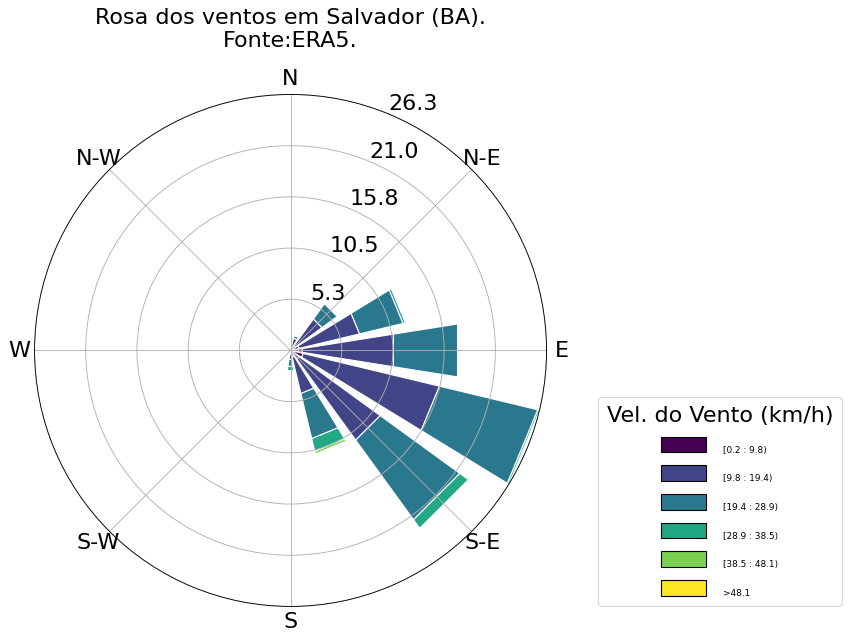

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from windrose import WindroseAxes, WindAxes, plot_windrose
from windrose import WindroseAxes
import matplotlib.cm as cm
import numpy as np

plt.rcParams["font.size"] = 20  

ax = WindroseAxes.from_ax()
ax.bar(df_ponto_2.DirVen, df_ponto_2.VELkm_h, normed=True, opening=0.8, edgecolor='white')
ax.set_xticklabels(['E','N-E','N','N-W','W','S-W','S','S-E'])
plt.title("Rosa dos ventos em Salvador (BA).\nFonte:ERA5.", y=1.08, fontsize='20')

#ax.set_legend()
ax.set_legend(title='Vel. do Vento (km/h)', loc=(1.1, 0), shadow=False)


# POR ESTAÇÃO DO ANO

In [24]:
#exemplo do que é feito 

from datetime import datetime

result = datetime.strptime('1988-01-01 00:00:00', '%Y-%m-%d %H:%M:%S').month % 12 // 3 + 1
print(result)


season_dict_HN = {1: "winter", 2: "spring", 
               3: "summer", 4: "autumn"}

season_dict_HS = {1: "Verão", 2: "Outono", 
               3: "Inverno", 4: "Primavera"}

season_dict_HS_2 = {1: "summer", 2: "autumn", 
               3: "winter", 4: "spring"}



for i in range(12):
    mes=i+1
    if mes <10:
        datinha= f'1988-0{mes}-01 00:00:00'
    else:
        datinha= f'1988-{mes}-01 00:00:00'
        
    result = datetime.strptime(datinha, '%Y-%m-%d %H:%M:%S').month % 12 // 3 + 1
    print('data  , tipo de estação')
    print(datinha,result, season_dict_HS[result])



1
data  , tipo de estação
1988-01-01 00:00:00 1 Verão
data  , tipo de estação
1988-02-01 00:00:00 1 Verão
data  , tipo de estação
1988-03-01 00:00:00 2 Outono
data  , tipo de estação
1988-04-01 00:00:00 2 Outono
data  , tipo de estação
1988-05-01 00:00:00 2 Outono
data  , tipo de estação
1988-06-01 00:00:00 3 Inverno
data  , tipo de estação
1988-07-01 00:00:00 3 Inverno
data  , tipo de estação
1988-08-01 00:00:00 3 Inverno
data  , tipo de estação
1988-09-01 00:00:00 4 Primavera
data  , tipo de estação
1988-10-01 00:00:00 4 Primavera
data  , tipo de estação
1988-11-01 00:00:00 4 Primavera
data  , tipo de estação
1988-12-01 00:00:00 1 Verão


In [27]:
# Convert to datetime and extract season
df_ponto_2["season"] = df_ponto_2["Data"].dt.month%12 //3 +1
df_ponto_2["season"] = df_ponto_2["season"].map(season_dict_HS)
# Filter
#df_ponto_2 = df_ponto_2.set_index("Data")
#df_ponto_2 = df_ponto_2.between_time('8:00', '21:00') #day

In [28]:
df_ponto_2

,Data,u10,v10,VEL(m/s),VEL(km/h),W03,W04,W05,W06,W07,DirVen,VELkm_h,season
0,2012-01-01 00:00:00,-7.306232,-2.769499,7.813524,28.128685,159.244993,69.244993,0.000000,0.0,0.0,69.244993,28.128685,Verão
1,2012-01-01 01:00:00,-6.766560,-2.983020,7.394913,26.621687,156.214449,66.214449,0.000000,0.0,0.0,66.214449,26.621687,Verão
2,2012-01-01 02:00:00,-6.241856,-3.090807,6.965189,25.074678,153.661096,63.661096,0.000000,0.0,0.0,63.661096,25.074678,Verão
3,2012-01-01 03:00:00,-5.989011,-3.176524,6.779274,24.405386,152.063361,62.063361,0.000000,0.0,0.0,62.063361,24.405386,Verão
4,2012-01-01 04:00:00,-5.890705,-3.277125,6.740916,24.267298,150.916328,60.916328,0.000000,0.0,0.0,60.916328,24.267298,Verão
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,2017-12-31 19:00:00,-6.702236,0.994326,6.775592,24.392130,171.566364,0.000000,98.433636,0.0,0.0,98.433636,24.392130,Verão
52604,2017-12-31 20:00:00,-6.922717,0.529814,6.942961,24.994659,175.628709,0.000000,94.371291,0.0,0.0,94.371291,24.994659,Verão
52605,2017-12-31 21:00:00,-7.098292,-0.136413,7.099603,25.558569,178.904319,88.904319,0.000000,0.0,0.0,88.904319,25.558569,Verão
52606,2017-12-31 22:00:00,-6.968835,-0.973560,7.036511,25.331438,172.052215,82.052215,0.000000,0.0,0.0,82.052215,25.331438,Verão


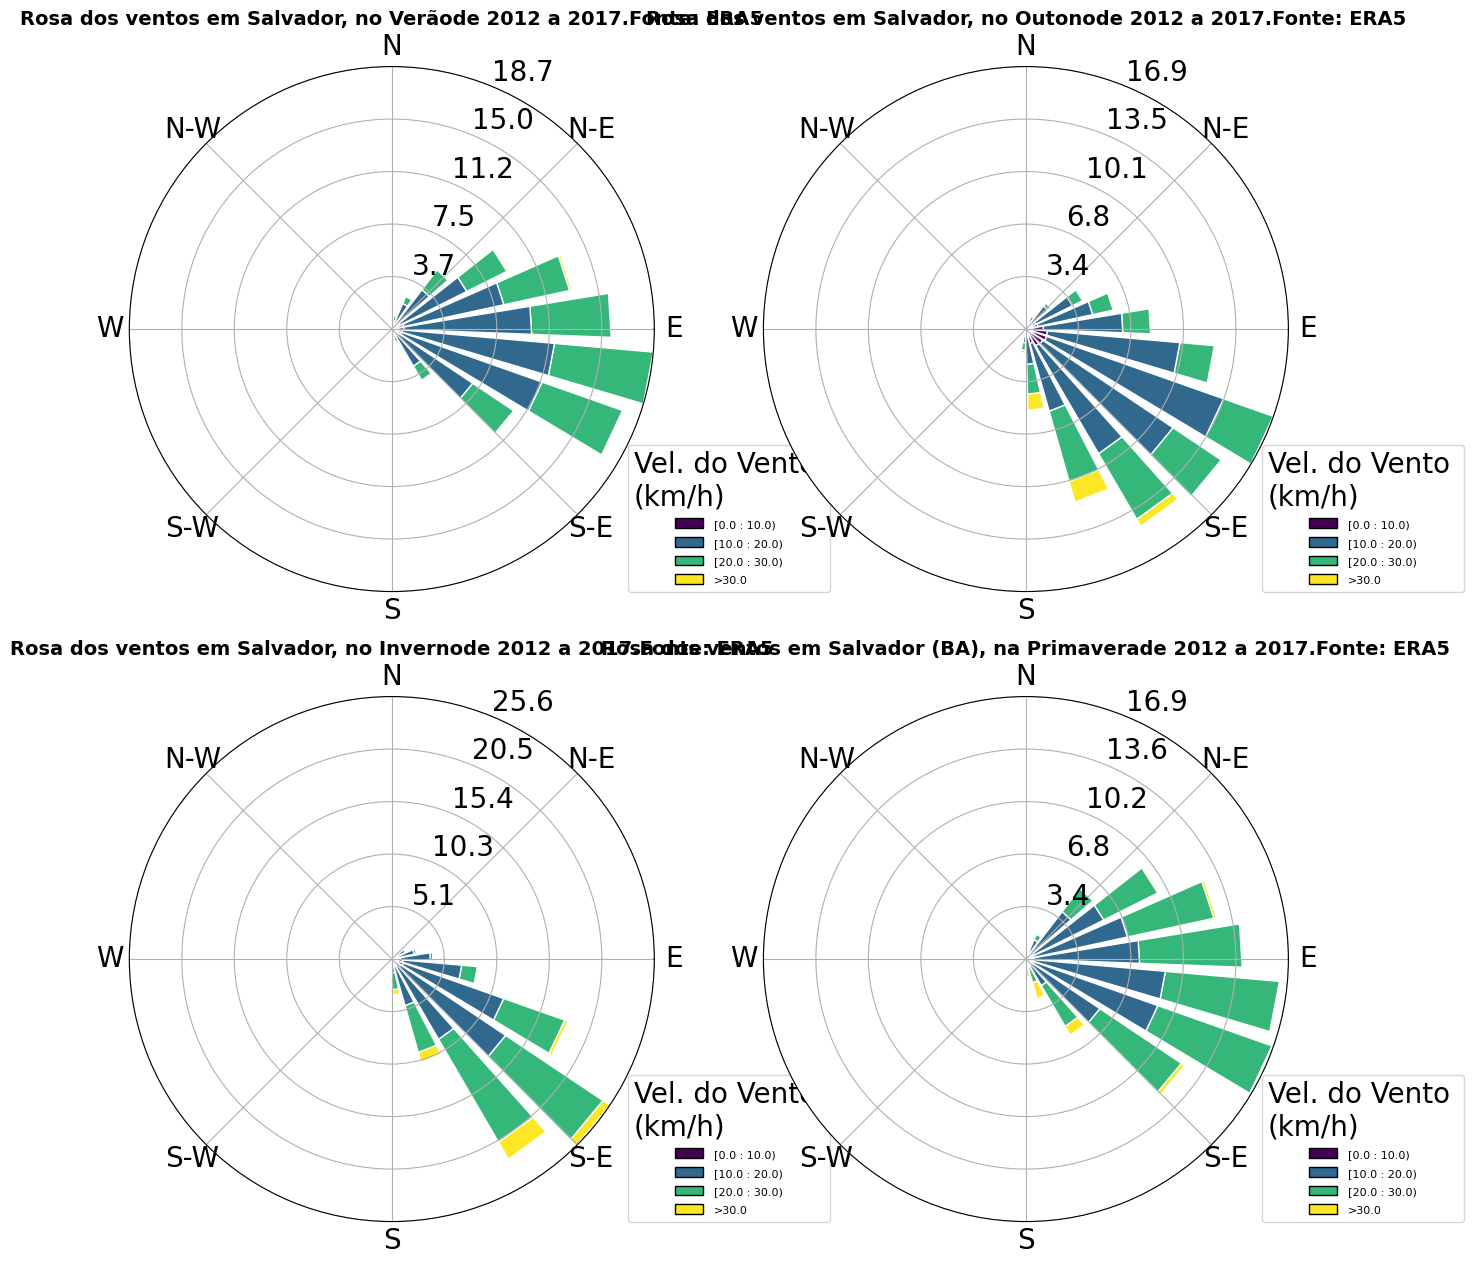

In [34]:
seasons = [v for k,v in season_dict_HS.items()]
# bins ou espaçamento da velocidade do vento (min, max e em quanto em quanto será plotado)
bins=np.arange(0, 40, 10)

nrows, ncols = 2, 2
fig = plt.figure(figsize=(15, 15))
# plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
for i, season in enumerate(seasons):
    d =  df_ponto_2[df_ponto_2["season"].eq(season)].reset_index(drop=True)
    ax = fig.add_subplot(nrows, ncols, i + 1, projection="windrose")
    
    if season.capitalize() in 'Primavera':
        ax.set_title(f'Rosa dos ventos em Salvador (BA), na ' + season.capitalize() + 'de 2012 a 2017.Fonte: ERA5' ,fontsize=14, weight='bold')
    else:
        ax.set_title(f'Rosa dos ventos em Salvador, no ' + season.capitalize() + 'de 2012 a 2017.Fonte: ERA5' ,fontsize=14, weight='bold')
    #ax.bar(d["DirVen"], d["VELkm_h"], normed=True, opening=0.8, bins=bins, cmap=cm.rainbow, nsector=20)
    
    #correto valor da direção dos ventos
    ax.bar(d["DirVen"], d["VELkm_h"], normed=True, opening=0.8, bins=bins,  edgecolor='white', nsector=25)
    
    #ax.bar(df_ponto_2.DirVen, df_ponto_2.VELkm_h, normed=True, opening=0.8, edgecolor='white', bins=bins, nsector=20)  
      
    ax.set_xticklabels(['E','N-E','N','N-W','W','S-W','S','S-E']) 
    ax.set_legend(title='Vel. do Vento \n(km/h)', loc=(0.95, 0), shadow=False, fontsize= 10)

In [33]:
df_ponto_2.sort_values(by='VELkm_h', ascending=False)

,Data,u10,v10,VEL(m/s),VEL(km/h),W03,W04,W05,W06,W07,DirVen,VELkm_h,season
24176,2014-10-04 08:00:00,-2.641343,13.083425,13.347385,48.050587,101.416717,0.000000,168.583283,0.000000,0.000000,168.583283,48.050587,Primavera
24177,2014-10-04 09:00:00,-2.796691,12.987955,13.285649,47.828335,102.154941,0.000000,167.845059,0.000000,0.000000,167.845059,47.828335,Primavera
24175,2014-10-04 07:00:00,-2.405085,12.957159,13.178483,47.442539,100.518428,0.000000,169.481572,0.000000,0.000000,169.481572,47.442539,Primavera
24181,2014-10-04 13:00:00,-2.992090,12.754930,13.101177,47.164238,103.204950,0.000000,166.795050,0.000000,0.000000,166.795050,47.164238,Primavera
24180,2014-10-04 12:00:00,-2.869511,12.744151,13.063210,47.027557,102.692298,0.000000,167.307702,0.000000,0.000000,167.307702,47.027557,Primavera
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31860,2015-08-20 12:00:00,-0.080125,-0.058909,0.099449,0.358018,143.680409,53.680409,0.000000,0.000000,0.000000,53.680409,0.358018,Inverno
19903,2014-04-09 07:00:00,-0.081338,0.037073,0.089389,0.321799,155.501587,0.000000,114.498413,0.000000,0.000000,114.498413,0.321799,Outono
30274,2015-06-15 10:00:00,0.005236,0.088400,0.088555,0.318799,86.612952,0.000000,0.000000,183.387048,0.000000,183.387048,0.318799,Inverno
19887,2014-04-08 15:00:00,0.044073,-0.065068,0.078589,0.282921,55.890471,0.000000,0.000000,0.000000,325.890471,325.890471,0.282921,Outono
